In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
heart = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Visualizing the Data

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

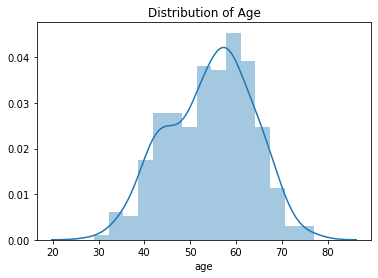

In [5]:
# Histogram

sns.distplot(heart['age'], bins = 15)
plt.title('Distribution of Age')
plt.show()

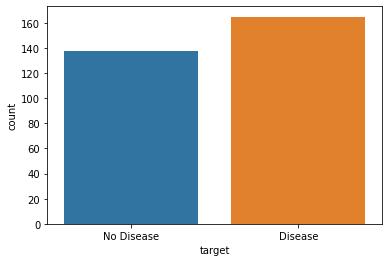

In [6]:
# Count how many people have the disease and how many people don't.

ax = plt.subplot()
sns.countplot(heart['target'])
ax.set_xticks([0,1])
ax.set_xticklabels(['No Disease', 'Disease'])
plt.show()

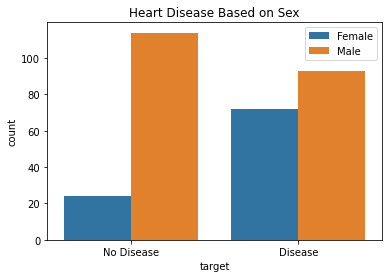

In [7]:
# How many men and women have heart disease?

ax = plt.subplot()
sns.countplot(x = heart['target'], hue = 'sex', data = heart)
ax.set_xticklabels(['No Disease', 'Disease'])
plt.legend(['Female', 'Male'])
plt.title('Heart Disease Based on Sex')
plt.show()

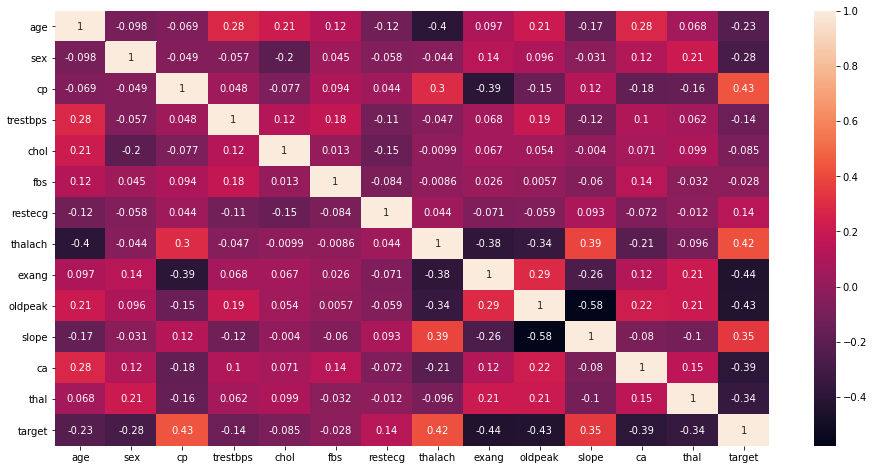

In [8]:
# Correlation Matrix

corr_matrix = heart.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

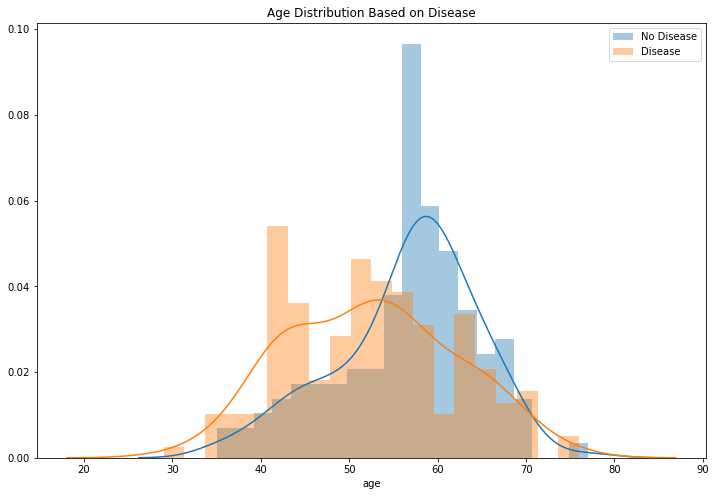

In [9]:
# Let's investigate the distibution of age based on heart disease.

plt.figure(figsize = (12,8))
sns.distplot(heart.age[heart['target'] == 0], label = 'No Disease', bins = 20)
sns.distplot(heart.age[heart['target'] == 1], label = 'Disease', bins = 20)
plt.legend()
plt.title('Age Distribution Based on Disease')
plt.show()

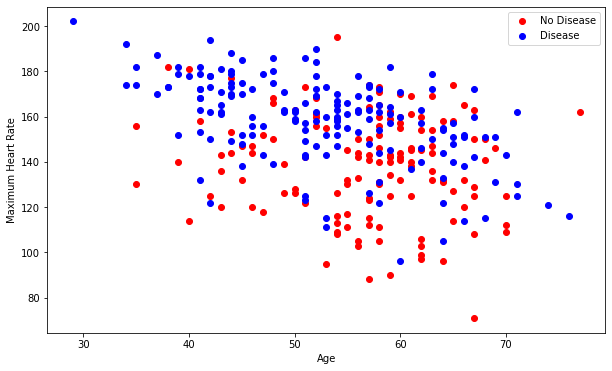

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(x = heart.age[heart['target'] == 0], y = heart.thalach[heart['target'] == 0], c = 'red')
plt.scatter(x = heart.age[heart['target'] == 1], y = heart.thalach[heart['target'] == 1], c = 'blue')
plt.legend(['No Disease', 'Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

# Machine Learning

In [11]:
# Import necessary libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [12]:
# Create dummy variables.

a = pd.get_dummies(heart['sex'], prefix = 'sex')
b = pd.get_dummies(heart['cp'], prefix = 'cp')
c = pd.get_dummies(heart['restecg'], prefix = 'restecg')
d = pd.get_dummies(heart['fbs'], prefix = 'fbs')
e = pd.get_dummies(heart['exang'], prefix = 'exang')
f = pd.get_dummies(heart['slope'], prefix = 'slope')
g = pd.get_dummies(heart['ca'], prefix = 'ca')
h = pd.get_dummies(heart['thal'], prefix = 'thal')

dummies = [heart, a, b, c, d, e, f, g, h]
heart = pd.concat(dummies, axis = 1)
heart = heart.drop(columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
heart.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [13]:
# Split up data by features and target variables

X = heart.drop(['target'], axis = 1).values
y = heart['target']
print(X.shape)
print(y.shape)

(303, 30)
(303,)


In [14]:
# Scale feature columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Split data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 30)
(61, 30)
(242,)
(61,)


### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))
print(logreg.score(X_train, y_train))

0.8688524590163934
0.8760330578512396


### Support Vector Machine

In [17]:
# Pick hyperparameters that result in the best accuracy rate.

from sklearn.svm import SVC

largest = {'value':0, 'gamma':1, 'C':1}
for gamma in range(1,7):
    for C in range(1,7):
        classifier = SVC(kernel = 'linear', C = C, gamma = gamma)
        classifier.fit(X_train, y_train)
        score = classifier.score(X_test, y_test)
        if (score > largest['value']):
            largest['value'] = score
            largest['gamma'] = gamma
            largest['C'] = C

print(largest)
print(classifier.score(X_train, y_train))

{'value': 0.8360655737704918, 'gamma': 1, 'C': 1}
0.871900826446281


### Random Forest 

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 25, bootstrap = True, max_features = 'sqrt')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

1.0
0.8688524590163934


### KNN 

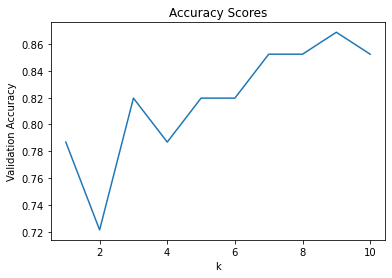

Accuracy score for KNN:  100.0 %.
Accuracy score for KNN:  87.0 %.


In [19]:
from sklearn.neighbors import KNeighborsClassifier

train_accuracies = []
test_accuracies = []
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))
    
# Plotting the results.

k_list = range(1,11)
plt.plot(k_list, test_accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy Scores')
plt.show()

print('Accuracy score for KNN: ', round(max(train_accuracies) * 100), '%.')
print('Accuracy score for KNN: ', round(max(test_accuracies) * 100), '%.')

### Naive Bayes Classifier

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))

0.4669421487603306
0.47540983606557374


In [21]:
accuracy_scores = {'Model':['Logistic Regression', 'SVM', 'Random Forest', 'KNN', 'Naive Bayes'], 
                   'Training Score':[87.6,87.19,99.58,100,46.69],
                   'Test Score':[86.88,83.60,83.6,87,47.54]}
accuracy_scores_df = pd.DataFrame(accuracy_scores)
accuracy_scores_df

,Model,Training Score,Test Score
0,Logistic Regression,87.60,86.88
1,SVM,87.19,83.60
2,Random Forest,99.58,83.60
3,KNN,100.00,87.00
4,Naive Bayes,46.69,47.54


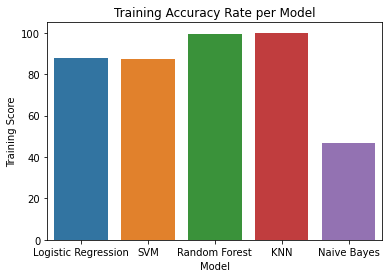

In [22]:
# Let's compare train set accuracy score.

sns.barplot(x = 'Model', y = 'Training Score', data = accuracy_scores_df)
plt.title('Training Accuracy Rate per Model')
plt.show()

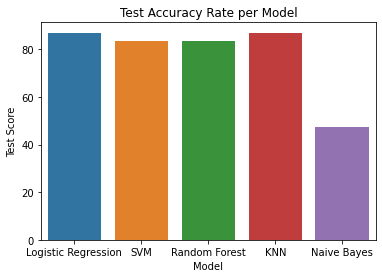

In [23]:
# Let's compare test set accuracy score.

sns.barplot(x = 'Model', y = 'Test Score', data = accuracy_scores_df)
plt.title('Test Accuracy Rate per Model')
plt.show()

### KNN algorithm has 100% accuracy rate from its training set and an 87% accuracy rate from its test set, making it the best choice for classifying heart disease patients. Naive Bayes was not a good classifier, it got less than half of the target values correct.